## EDA

----- Dataset Preview -----
               t_stamp  P1_STATE  LIT101.Pv  FIT101.Pv  MV101.Status  \
0  2024-04-23 09:15:00         1   548.8321        0.0             1   
1  2024-04-23 09:15:01         1   548.8321        0.0             1   
2  2024-04-23 09:15:02         1   548.8321        0.0             1   
3  2024-04-23 09:15:03         1   548.8321        0.0             1   
4  2024-04-23 09:15:04         1   548.8321        0.0             1   

   P101.Status  P102.Status  P2_STATE  FIT201.Pv   AIT201.Pv  ...  FIT602.Pv  \
0            1            1         1        0.0  230.197388  ...   1.017204   
1            1            1         1        0.0  230.005127  ...   1.005511   
2            1            1         1        0.0  230.005127  ...   1.005511   
3            1            1         1        0.0  230.005127  ...   1.013200   
4            1            1         1        0.0  230.005127  ...   1.009515   

   P601.Status  P602.Status  P603.Status  LSH601.Alarm  LS

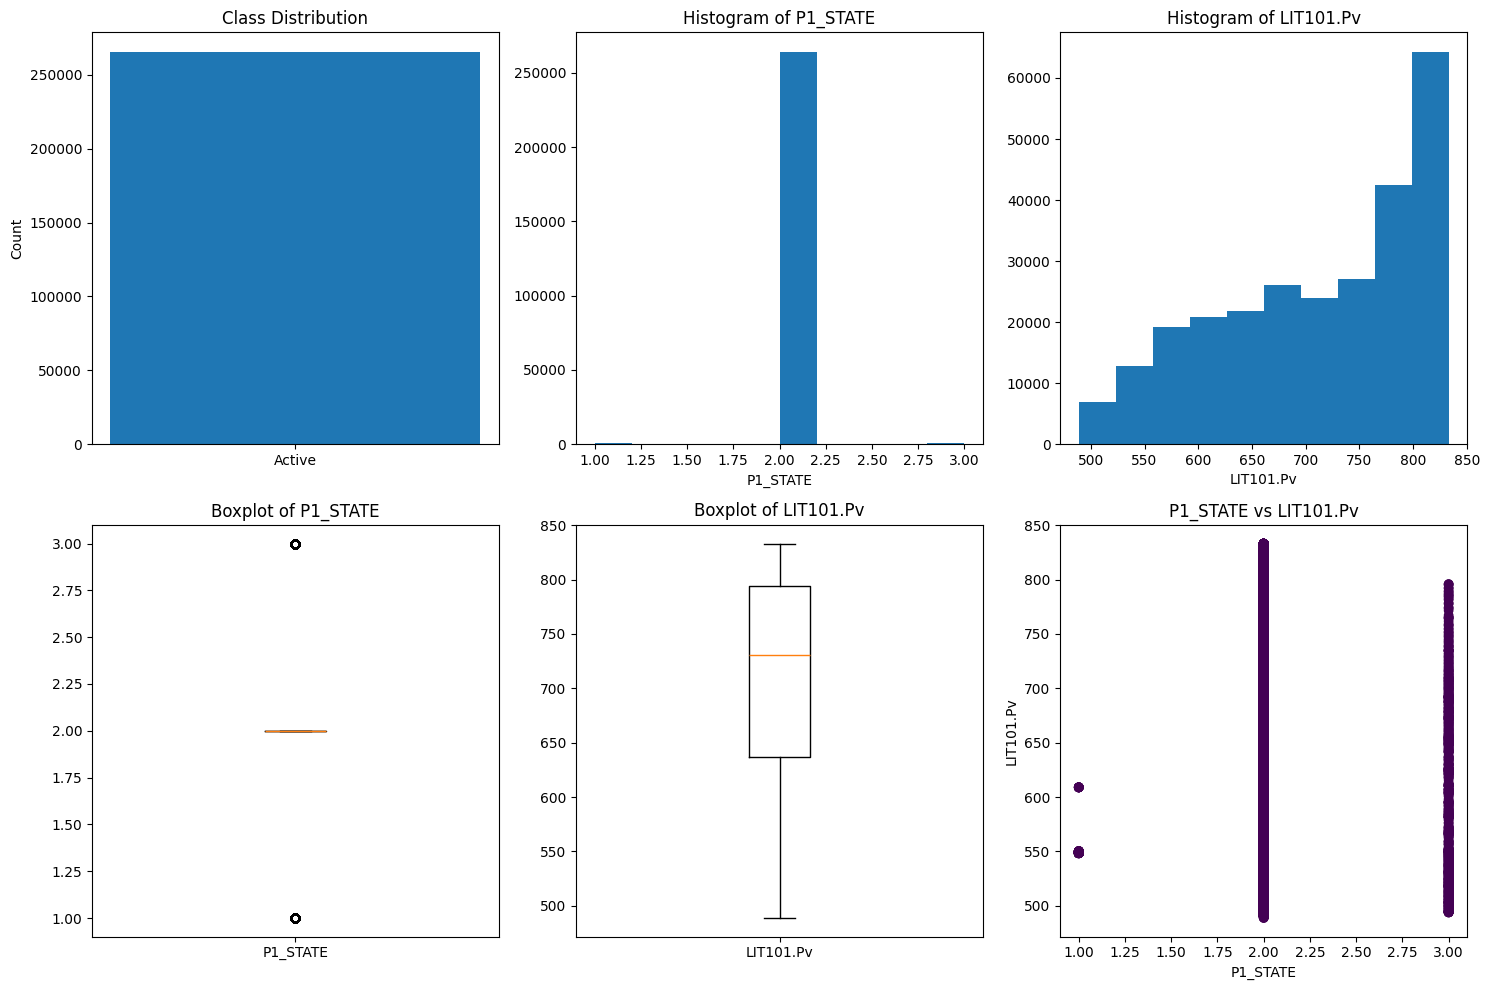

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('1.csv')
print("----- Dataset Preview -----")
print(df.head(), "\n")
print("----- Missing Values per Column -----")
print(df.isnull().sum(), "\n")

target_col = df.columns[-1]
class_counts = df[target_col].value_counts()
num_df = df.select_dtypes(include=['number'])

fig = plt.figure(figsize=(15,10))
plt.subplot(231)
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Count')

plt.subplot(232)
plt.hist(df[num_df.columns[0]].dropna())
plt.title(f'Histogram of {num_df.columns[0]}')
plt.xlabel(num_df.columns[0])

plt.subplot(233)
plt.hist(df[num_df.columns[1]].dropna())
plt.title(f'Histogram of {num_df.columns[1]}')
plt.xlabel(num_df.columns[1])

plt.subplot(234)
plt.boxplot(df[num_df.columns[0]].dropna())
plt.title(f'Boxplot of {num_df.columns[0]}')
plt.xticks([1], [num_df.columns[0]])

plt.subplot(235)
plt.boxplot(df[num_df.columns[1]].dropna())
plt.title(f'Boxplot of {num_df.columns[1]}')
plt.xticks([1], [num_df.columns[1]])

plt.subplot(236)
plt.scatter(
    df[num_df.columns[0]],
    df[num_df.columns[1]],
    c=df[target_col].astype('category').cat.codes
)
plt.title(f'{num_df.columns[0]} vs {num_df.columns[1]}')
plt.xlabel(num_df.columns[0])
plt.ylabel(num_df.columns[1])

plt.tight_layout()
plt.show()


## Preprocessing for FNN & Random Forest 

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

df = pd.read_csv('1.csv')
target_col = df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
        except:
            X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


/tmp/ipykernel_13049/3399233633.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
/tmp/ipykernel_13049/3399233633.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


## Preprocessing for Feed-Forward Neural Network (FNN)

In [3]:

X_train_fnn = X_train_scaled.copy()
X_test_fnn  = X_test_scaled.copy()
y_train_fnn = y_train.copy()
y_test_fnn  = y_test.copy()



## Preprocessing for an LSTM (sequence input) 

In [4]:
X_train_lstm = X_train_fnn.reshape((X_train_fnn.shape[0], 1, X_train_fnn.shape[1]))
X_test_lstm  = X_test_fnn.reshape((X_test_fnn.shape[0], 1, X_test_fnn.shape[1]))


## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53100

    accuracy                           1.00     53100
   macro avg       1.00      1.00      1.00     53100
weighted avg       1.00      1.00      1.00     53100



## FNN

/tmp/ipykernel_13049/2875629142.py:13: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = pd.to_datetime(X[col]).view(int) // 10**9
/tmp/ipykernel_13049/2875629142.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).view(int) // 10**9
/tmp/ipykernel_13049/2875629142.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).view(int) // 10**9


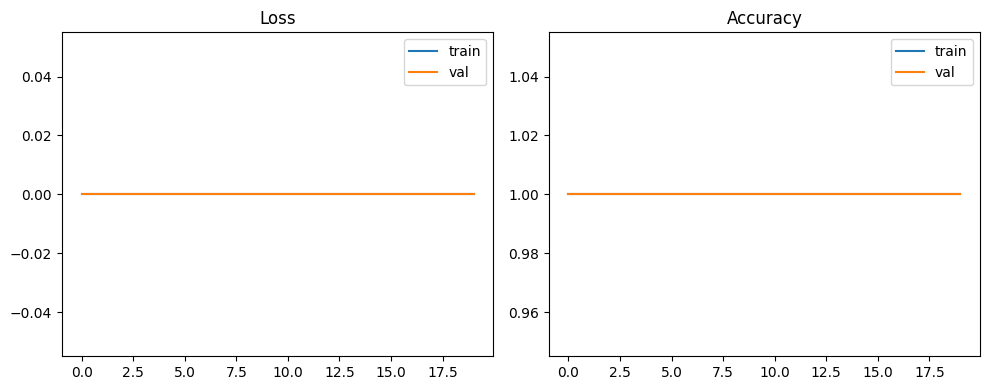

1.0
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00     39825

    accuracy                           1.00     39825
   macro avg       1.00      1.00      1.00     39825
weighted avg       1.00      1.00      1.00     39825



In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X = df.iloc[:, :-1]
y_raw = df.iloc[:, -1]
le = LabelEncoder().fit(y_raw)
y = le.transform(y_raw)
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_datetime(X[col]).view(int) // 10**9
        except:
            X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42, stratify=y_val_test
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_tensor   = torch.tensor(y_val, dtype=torch.long).to(device)
X_test_tensor  = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor  = torch.tensor(y_test, dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_tensor,   y_val_tensor),   batch_size=32)
test_loader  = DataLoader(TensorDataset(X_test_tensor,  y_test_tensor),  batch_size=32)

class FeedForward(nn.Module):
    def __init__(self, in_dim, h1, h2, out_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, h1),
            nn.ReLU(),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Linear(h2, out_dim)
        )
    def forward(self, x):
        return self.net(x)

model     = FeedForward(X_train_scaled.shape[1], 64, 32, len(le.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses, val_losses, train_accs, val_accs = [], [], [], []
for epoch in range(20):
    model.train()
    tl, tc, tt = 0, 0, 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tl += loss.item() * xb.size(0)
        preds = out.argmax(1)
        tc += (preds == yb).sum().item()
        tt += yb.size(0)
    train_losses.append(tl/tt)
    train_accs.append(tc/tt)

    model.eval()
    vl, vc, vt = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            out = model(xb)
            loss = criterion(out, yb)
            vl += loss.item() * xb.size(0)
            preds = out.argmax(1)
            vc += (preds == yb).sum().item()
            vt += yb.size(0)
    val_losses.append(vl/vt)
    val_accs.append(vc/vt)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='train')
plt.plot(val_losses,   label='val')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accs, label='train')
plt.plot(val_accs,   label='val')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

model.eval()
tc, tt = 0, 0
all_preds, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        preds = out.argmax(1)
        all_preds.append(preds.cpu().numpy())
        all_labels.append(yb.cpu().numpy())
        tc += (preds == yb).sum().item()
        tt += yb.size(0)
test_acc = tc/tt
print(test_acc)
print(classification_report(np.concatenate(all_labels), np.concatenate(all_preds), target_names=le.classes_))


## LSTM

/tmp/ipykernel_13049/3013140895.py:19: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = pd.to_datetime(X[col]).view(int) // 10**9
/tmp/ipykernel_13049/3013140895.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).view(int) // 10**9
/tmp/ipykernel_13049/3013140895.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).view(int) // 10**9


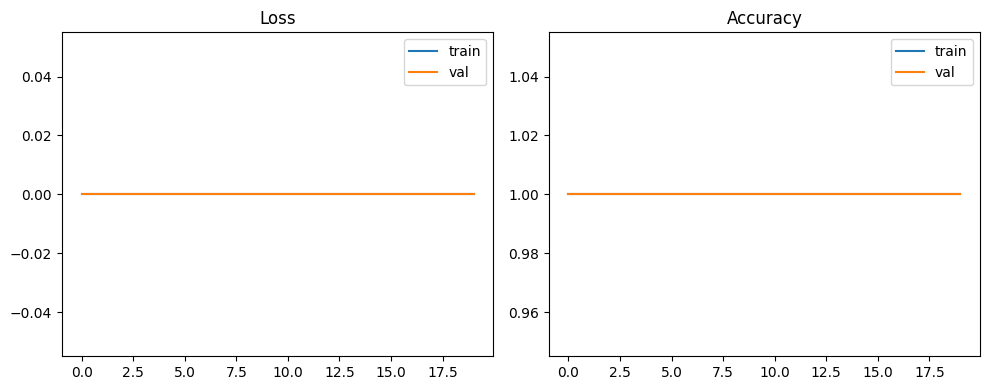

1.0


In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X = df.iloc[:, :-1]
y_raw = df.iloc[:, -1]
le = LabelEncoder().fit(y_raw)
y = le.transform(y_raw)
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_datetime(X[col]).view(int) // 10**9
        except:
            X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42, stratify=y_val_test
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_val_lstm = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

device = torch.device('cpu')
X_train_tensor = torch.tensor(X_train_lstm, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_lstm, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_lstm, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=32)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

class LSTMClassifier(nn.Module):
    def __init__(self, in_size, hidden, layers, out_dim):
        super().__init__()
        self.lstm = nn.LSTM(in_size, hidden, layers, batch_first=True)
        self.fc1 = nn.Linear(hidden, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, out_dim)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc1(out)
        out = self.relu(out)
        return self.fc2(out)

model = LSTMClassifier(X_train_lstm.shape[2], 64, 1, len(le.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses, val_losses, train_accs, val_accs = [], [], [], []
for epoch in range(20):
    model.train()
    tl, tc, tt = 0, 0, 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tl += loss.item() * xb.size(0)
        preds = out.argmax(1)
        tc += (preds == yb).sum().item()
        tt += yb.size(0)
    train_losses.append(tl/tt)
    train_accs.append(tc/tt)
    model.eval()
    vl, vc, vt = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            out = model(xb)
            loss = criterion(out, yb)
            vl += loss.item() * xb.size(0)
            preds = out.argmax(1)
            vc += (preds == yb).sum().item()
            vt += yb.size(0)
    val_losses.append(vl/vt)
    val_accs.append(vc/vt)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='val')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

model.eval()
tc, tt = 0, 0
all_preds, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        preds = out.argmax(1)
        all_preds.append(preds.numpy())
        all_labels.append(yb.numpy())
        tc += (preds == yb).sum().item()
        tt += yb.size(0)
test_acc = tc/tt
print(test_acc)
